In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")



In [31]:
print(train_data.shape)
print(test_data.shape)


(1296675, 23)
(555719, 23)


In [32]:
print(train_data.columns)
print(test_data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [33]:
train_data=train_data.drop(columns='Unnamed: 0')
test_data=test_data.drop(columns='Unnamed: 0')

In [34]:
print(train_data.head(5))
print(test_data.head(5))

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393 

In [35]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop       

In [36]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [37]:
df = pd.concat([train_data,test_data])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [38]:

df.drop(['trans_date_trans_time','dob','unix_time','zip'],axis=1,inplace=True)

In [39]:
df.dtypes

cc_num          int64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
lat           float64
long          float64
city_pop        int64
job            object
trans_num      object
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [40]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = label.fit_transform(df[col])


In [41]:
df.dtypes

cc_num          int64
merchant        int32
category        int32
amt           float64
first           int32
last            int32
gender          int32
street          int32
city            int32
state           int32
lat           float64
long          float64
city_pop        int64
job             int32
trans_num       int32
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [42]:
fraud_cnt = df['is_fraud'].value_counts()
fraud_cnt
#imbalance dataset

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

### As the dataset is highly imbalanace without training any model will get an accuracy of 99% . Accuracy should not be considered as a scale for imbalanced dataset

### Training Model with Imbalanced dataset is an inefficient way . So, the dataset is sampled down

In [43]:
from sklearn.utils import resample

df_max=df[df['is_fraud']==0]
df_min=df[df['is_fraud']==1]


df_max_sample =resample(df_max,n_samples=2037,replace=False,random_state=42)

In [44]:
sample_df=pd.concat([df_max_sample,df_min])

In [45]:
sample_df['is_fraud'].value_counts().to_frame()

,count
is_fraud,
1,9651
0,2037


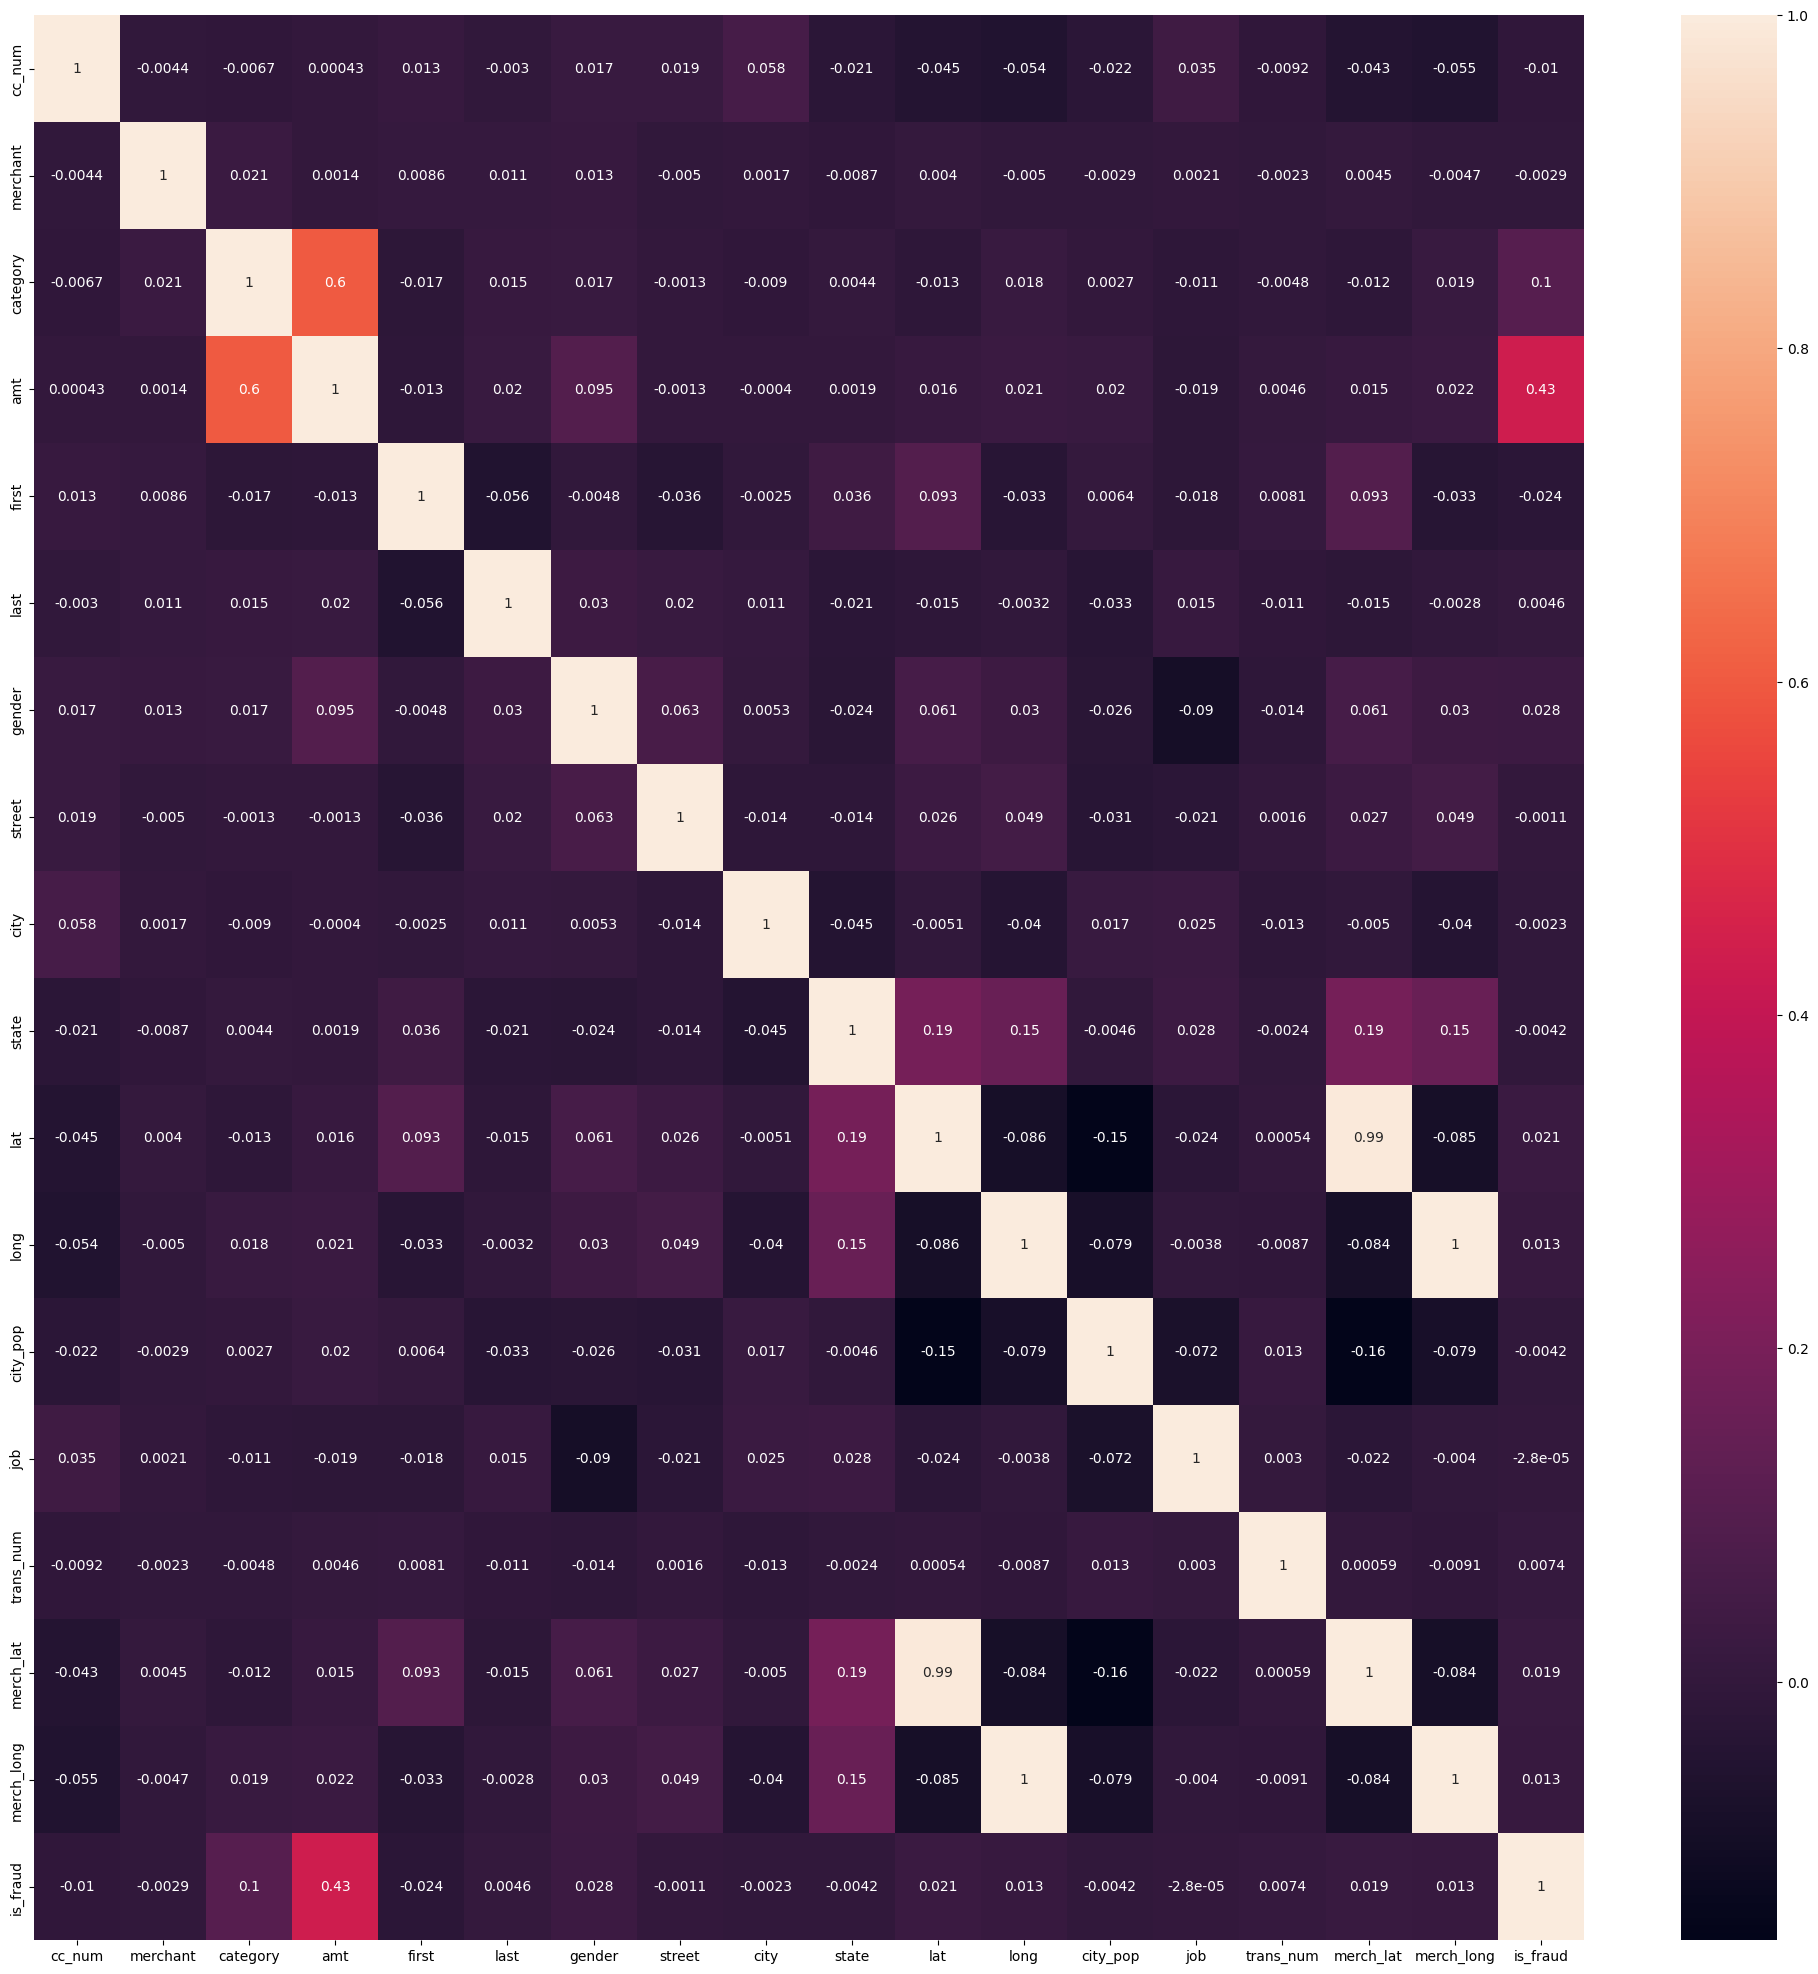

In [46]:
plt.figure(figsize=(25,25))
sns.heatmap(sample_df.corr(),annot=True)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

x = sample_df.drop('is_fraud',axis=1)
y = sample_df.is_fraud

x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [48]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(X_test)

Decision Tree Accuracy: 0.9657827202737382


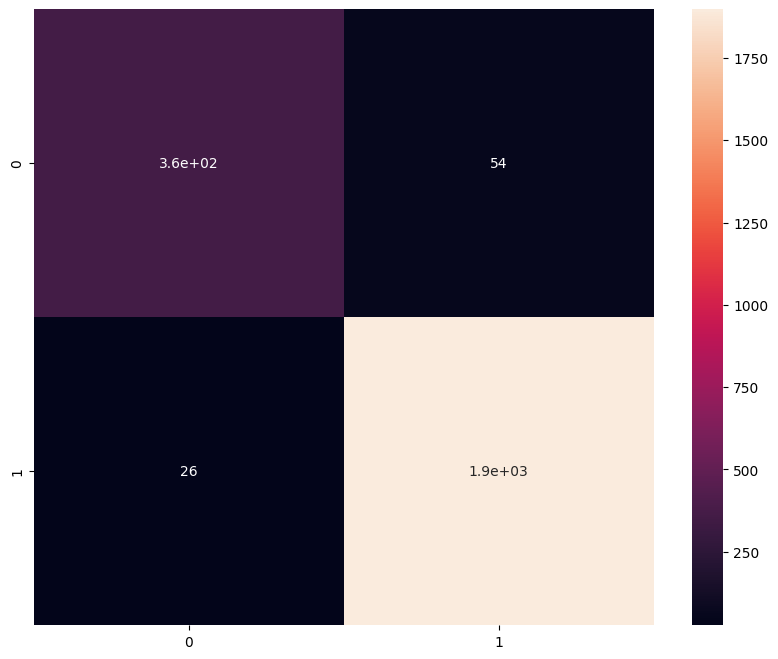

In [49]:
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Decision Tree Accuracy:", rf_accuracy)
cm = confusion_matrix(y_test,rf_pred)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()

In [50]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
logistic_pred = logistic.predict(X_test)



Logistic regression Accuracy: 0.8229255774165953


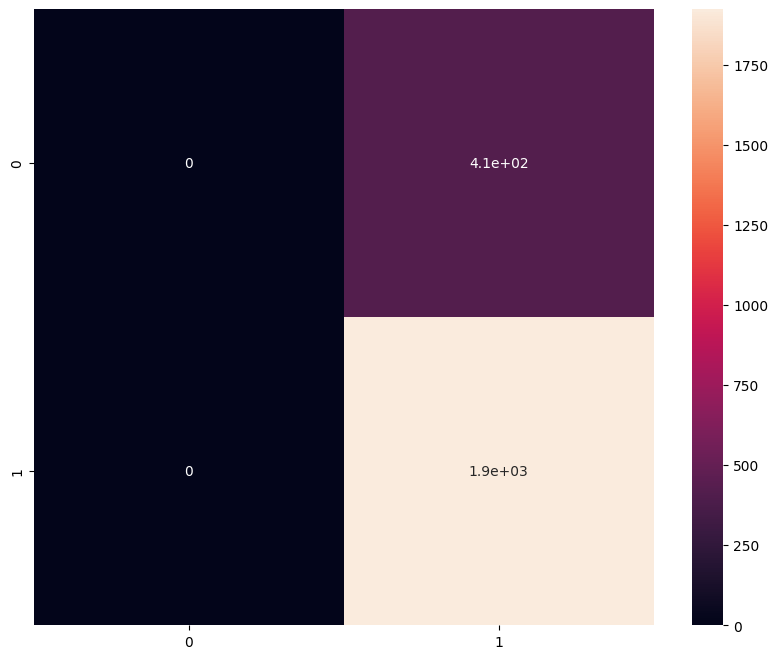

In [51]:
logistic_accuracy = accuracy_score(y_test,logistic_pred)
print("Logistic regression Accuracy:", logistic_accuracy)
cm = confusion_matrix(y_test,logistic_pred)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()

In [52]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
df_pred = dt.predict(X_test)
 

Decision Tree Accuracy: 0.9649272882805817


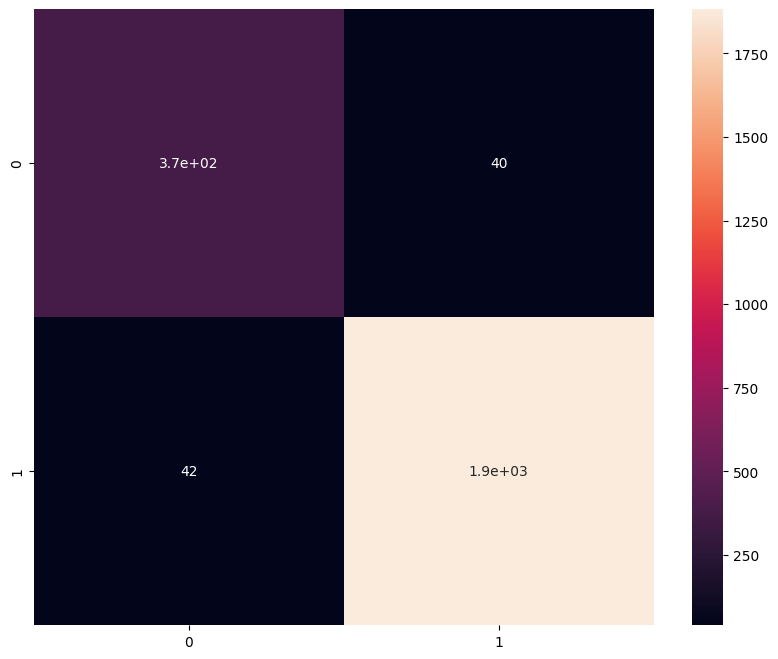

In [53]:
df_accuracy = accuracy_score(y_test,df_pred)
print("Decision Tree Accuracy:", df_accuracy)
cm = confusion_matrix(y_test,df_pred)
%matplotlib inline
plt.figure(figsize=((10,8)))
sns.heatmap(cm,annot = True)

plt.show()